In [1]:
import pandas as pd

train_df = pd.read_csv('cleaned_train.csv')
test_df = pd.read_csv('cleaned_test.csv')
ID = test_df['ID']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings


# Define features and target variable
X = train_df.drop(columns=['Credit_Score'])
y = train_df['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# Remove columns with correlation less than 0.1 with Credit_Score
low_corr_columns = correlation_with_target[correlation_with_target < 0.3].index
X_filtered = X.drop(columns=low_corr_columns)

# Split the filtered data into training and testing sets
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Standardize the filtered features
X_train_filtered = scaler.fit_transform(X_train_filtered)
X_test_filtered = scaler.transform(X_test_filtered)

# Fit the classifier to the filtered training data
knn.fit(X_train_filtered, y_train)

# Predict the target variable for the filtered test data
y_pred = knn.predict(X_test_filtered)

# Calculate the accuracy of the model with filtered features
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with filtered features: {accuracy:.2f}')

Accuracy with filtered features: 0.69


[[3221 1203  146]
 [1383 6109  775]
 [ 194 1119 1432]]


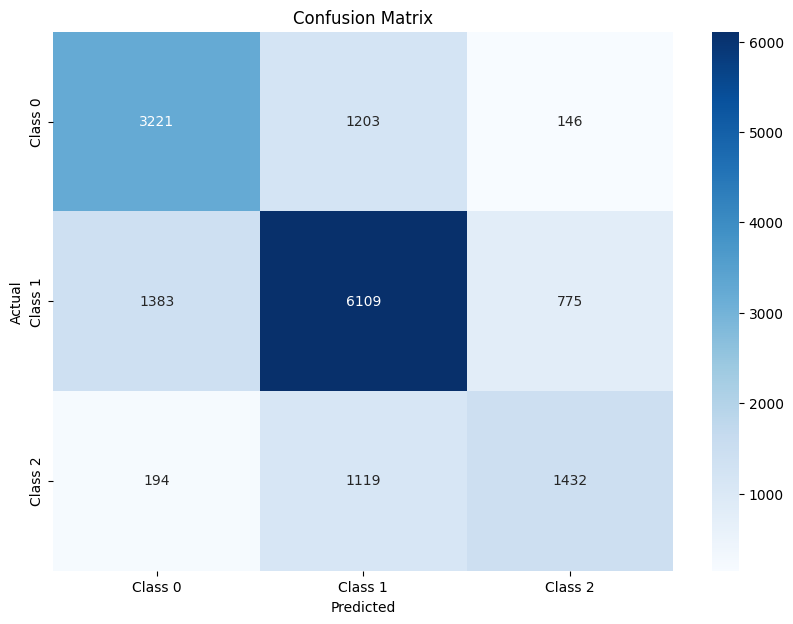

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()